Подключение библиотек:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
import tarfile
import urllib

Ввод исходной таблицы (красные вина):

In [3]:
from google.colab import files
uploaded = files.upload()

Saving wine-quality-red.csv to wine-quality-red.csv


Отображение исходной таблицы:

In [4]:
data = pd.read_csv('wine-quality-red.csv',sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Построение гистограмм:

In [7]:
%matplotlib inline

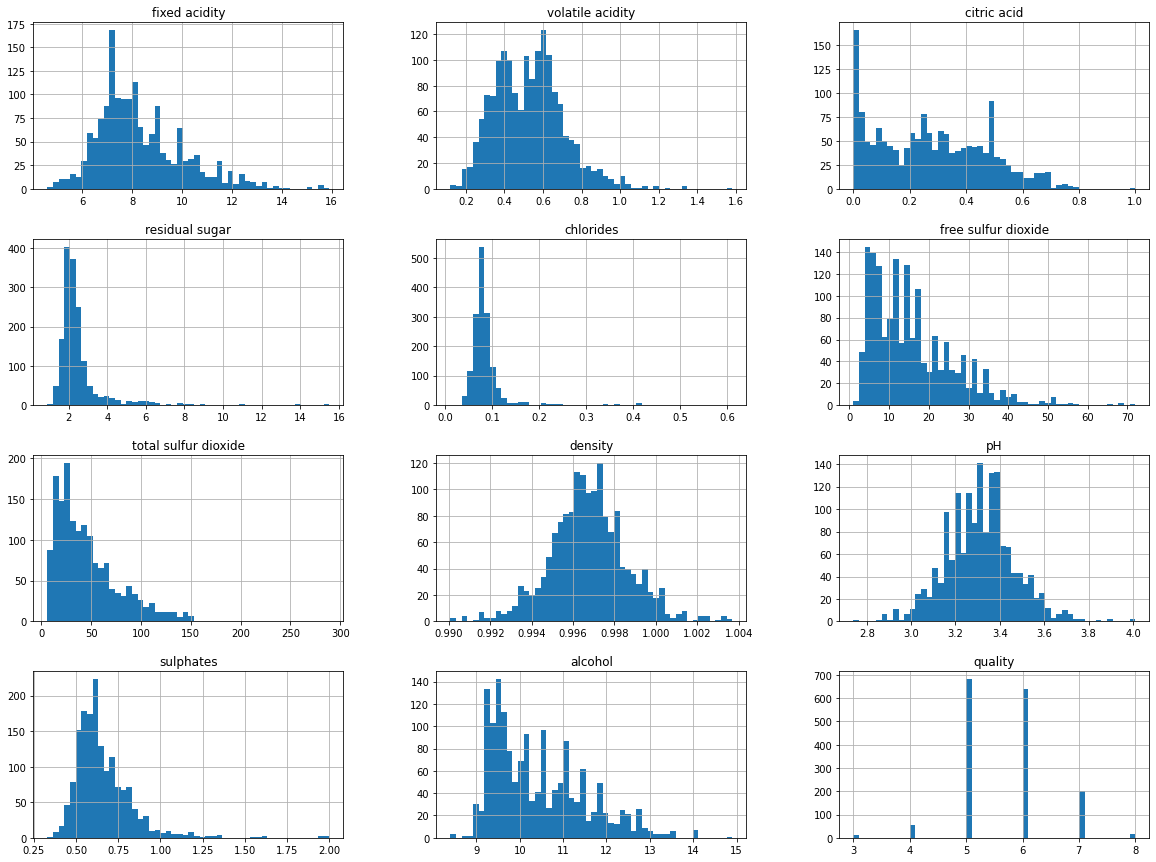

In [8]:
data.hist(bins=50,figsize=(20,15))
plt.show();

In [9]:
print("density:", data["density"].min(),data["density"].max() )
print("pH:", data["pH"].min(),data["pH"].max() )
print("sulphates:", data["sulphates"].min(),data["sulphates"].max() )
print("alcohol:", data["alcohol"].min(),data["alcohol"].max() )
print("quality:", data["quality"].min(),data["quality"].max() )

density: 0.99007 1.00369
pH: 2.74 4.01
sulphates: 0.33 2.0
alcohol: 8.4 14.9
quality: 3 8


Случайная выборка (на примере плотности):

In [10]:
from sklearn.model_selection import train_test_split

# train_test_split разбивает несколько наборов с одинаковым числом строк по одинаковым индексам
train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 42 )

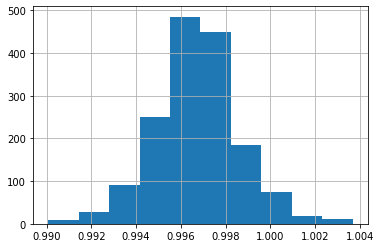

In [11]:
data['density'].hist();

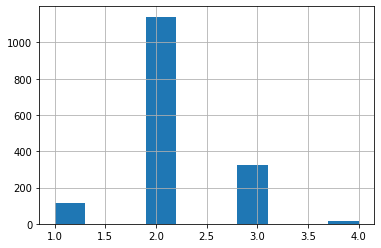

In [12]:
data['density_level'] = pd.cut(data['density'],bins=[0.99,0.994,0.998,1.002,1.006, np.inf],labels=[1,2,3,4,5])
data.density_level.hist();

Стратификационная выборка (на примере плотности):

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
# или train_test_split с параметром stratify
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(data,data['density_level']):
    print(train_index)
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

[ 800 1394   77 ...   23 1027  691]


Диаграмма рассеяния:

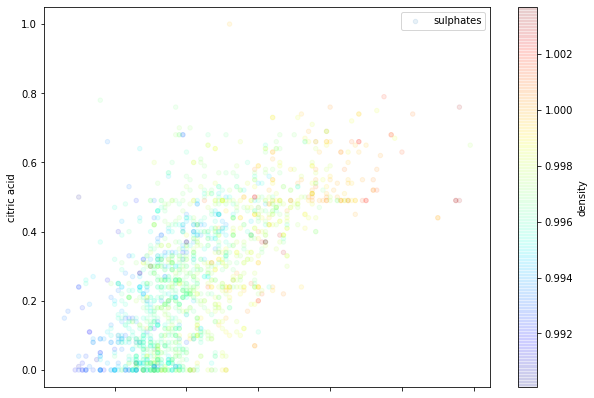

In [14]:
data.plot(kind="scatter",x="fixed acidity",y = "citric acid",alpha = 0.1,label="sulphates",figsize=(10,7),c="density",cmap = plt.get_cmap("jet"),colorbar=True)
plt.legend()

Из анализа вытекает, что плотность винного напитка находится в сильной зависимости от уровня фиксированной кислотности

Вычислим коэффициент корреляции Пирсона для выявления линейных связей:

In [15]:
corr_matrix = data.corr()
corr_matrix['density'].sort_values(ascending=False)

density                 1.000000
fixed acidity           0.668047
citric acid             0.364947
residual sugar          0.355283
chlorides               0.200632
sulphates               0.148506
total sulfur dioxide    0.071269
volatile acidity        0.022026
free sulfur dioxide    -0.021946
quality                -0.174919
pH                     -0.341699
alcohol                -0.496180
Name: density, dtype: float64

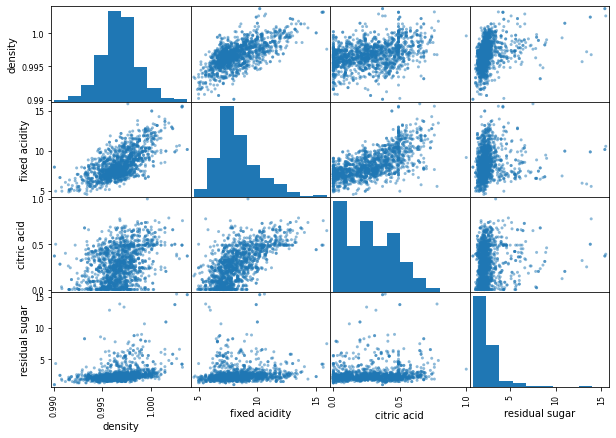

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["density", "fixed acidity", "citric acid", "residual sugar"]
scatter_matrix(data[attributes],figsize=(10,7));

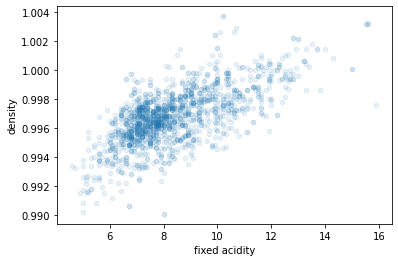

In [17]:
data.plot(kind='scatter',x='fixed acidity',y='density',alpha=0.1)

На данном графике видна сильная корреляция между уровнем фиксированной кислотности и плотностью винного напитка

In [18]:
data['citric acid/density'] = data['citric acid'] / data['density']
data['residual sugar/density'] = data['residual sugar'] / data['density']
data['quality/alcohol'] = data['quality'] / data['alcohol']

In [19]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,density_level,citric acid/density,residual sugar/density,quality/alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2,0.000000,1.904189,0.531915
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2,0.000000,2.608347,0.510204
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,0.040120,2.306921,0.510204
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2,0.561122,1.903808,0.612245
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2,0.000000,1.904189,0.531915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2,0.080410,2.010252,0.476190
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2,0.100490,2.210789,0.535714
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2,0.130556,2.309840,0.545455
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2,0.120546,2.009101,0.490196


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   fixed acidity           1599 non-null   float64 
 1   volatile acidity        1599 non-null   float64 
 2   citric acid             1599 non-null   float64 
 3   residual sugar          1599 non-null   float64 
 4   chlorides               1599 non-null   float64 
 5   free sulfur dioxide     1599 non-null   float64 
 6   total sulfur dioxide    1599 non-null   float64 
 7   density                 1599 non-null   float64 
 8   pH                      1599 non-null   float64 
 9   sulphates               1599 non-null   float64 
 10  alcohol                 1599 non-null   float64 
 11  quality                 1599 non-null   int64   
 12  density_level           1599 non-null   category
 13  citric acid/density     1599 non-null   float64 
 14  residual sugar/density  

In [21]:
corr_matrix = data.corr()
corr_matrix['density'].sort_values(ascending=False)

density                   1.000000
fixed acidity             0.668047
citric acid               0.364947
citric acid/density       0.362365
residual sugar            0.355283
residual sugar/density    0.352195
chlorides                 0.200632
quality/alcohol           0.190624
sulphates                 0.148506
total sulfur dioxide      0.071269
volatile acidity          0.022026
free sulfur dioxide      -0.021946
quality                  -0.174919
pH                       -0.341699
alcohol                  -0.496180
Name: density, dtype: float64

In [22]:
needed_features = ['fixed acidity','citric acid','citric acid/density','Outcome/Glucose','regular sugar', 'regular sugar/density']

In [23]:
data = strat_train_set.drop('density',axis=1)
diabetes_labels = strat_train_set['density'].copy()